In [95]:
import torch
data = torch.randn([1, 25088])

In [101]:
x1 = torch.concat([data, torch.zeros([1, 512])], dim=1)
x2 = data

y1 = torch.stft(x1, 512, hop_length=256, return_complex=True)
y2 = torch.stft(x2, 512, hop_length=256, return_complex=True)
y_ = torch.stft(torch.concat([x2[:, 24832:], torch.zeros([1, 256])], dim=1), 512, hop_length=256, return_complex=True, center=False)
y2 = torch.concat([y2[:,:, :-1], y_, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]])], dim=2)
# y2 = torch.concat([y2, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]])], dim=2)

In [102]:
print(torch.sum(torch.abs(torch.abs(y1[:,:, 99]) - torch.abs(y2[:,:, 99]))))

In [103]:
print(torch.sum(torch.abs(torch.abs(y1) - torch.abs(y2))))

In [104]:
x1 = torch.concat([data, torch.zeros([1, 512])], dim=1)
x2 = data

y1 = torch.stft(x1, 512, hop_length=256, return_complex=True, center=False)
y2 = torch.stft(x2, 512, hop_length=256, return_complex=True, center=False)
y_ = torch.stft(torch.concat([x2[:, 24832:], torch.zeros([1, 256])], dim=1), 512, hop_length=256, return_complex=True, center=False)
y2 = torch.concat([y2, y_, torch.zeros([1, 257, y1.shape[2]-y2.shape[2]-1])], dim=2)
print(torch.sum(torch.abs(torch.abs(y1) - torch.abs(y2))))

In [11]:
import time
from progressbar import ProgressBar, Percentage, Bar, Timer, ETA

widgets = ['Progress: ',Percentage(), ' ', Bar('#'),' ', Timer(),
           ' ', ETA()]
progress = ProgressBar(widgets=widgets).start()
for i in progress(range(100)):
    time.sleep(0.04)

In [2]:
with open("wav_polqa.list", "r", encoding="utf-8") as f:
    li = f.read().splitlines()

import random
random.shuffle(li)

li_ = li[:2000]
with open("wav_polqa_mini.list", "w", encoding="utf-8") as f:
    for l in li_:
        f.write(l+"\n")


In [1]:
from trainer_utils import EarlyStopping, Args
import time
x = 10
args = Args(model_type="")
print(args.patience)
early_stopping = EarlyStopping(args.patience, args.delta_loss)
for i in range(20):
    time.sleep(0.1)
    if i < 5:
        x -= 0.1
    else:
        x += 1e-4
    print(x)
    if early_stopping(x):
        print("Early stopping")
        break

5
9.9
9.8
9.700000000000001
9.600000000000001
9.500000000000002
9.500100000000002
9.500200000000001
9.500300000000001
9.5004
9.5005
The validation loss continual increase in 5 iterations, stop train
The final validation loss is 9.5005
Early stopping


In [1]:
with open("wav_polqa.list", "r", encoding="utf-8") as f:
    li = f.read().splitlines()

polqa = [float(l.split(",")[1]) for l in li]


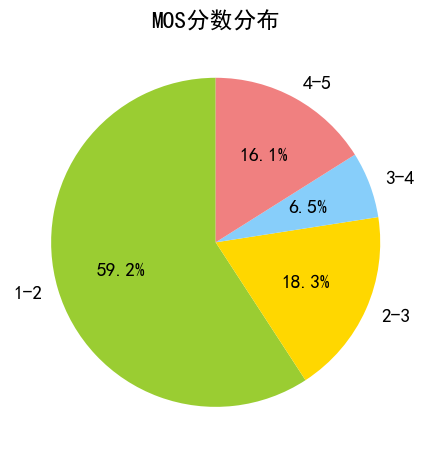

In [19]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
plt.rcParams['font.size'] = "14.0"
dpi = 300
polqa = np.array(polqa)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 每一块的颜色
part = [len(polqa[(polqa>=i) & (polqa < (i + 1))]) for i in range(1,5)]
plt.figure(dpi=100)
plt.pie(part, labels=["1-2", "2-3", "3-4", "4-5"], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("MOS分数分布")
plt.tight_layout()
plt.savefig("images/MOS分数分布图.png", dpi=dpi)